# Simple Linear Regression

In [37]:
from warnings import filterwarnings
filterwarnings("ignore")

In [38]:
import pandas as pd
df= pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# I want understand relationship between RND and PROFIT
# PROFIT ~ RND
# Profit_pred = B0 + B1*RND
# X = RND, Y = PROFIT

X = df[["RND"]]
Y = df [["PROFIT"]]

In [39]:
X = df[["RND"]]
Y = df[["PROFIT"]]

X.head()


,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [40]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


<Axes: xlabel='RND', ylabel='PROFIT'>

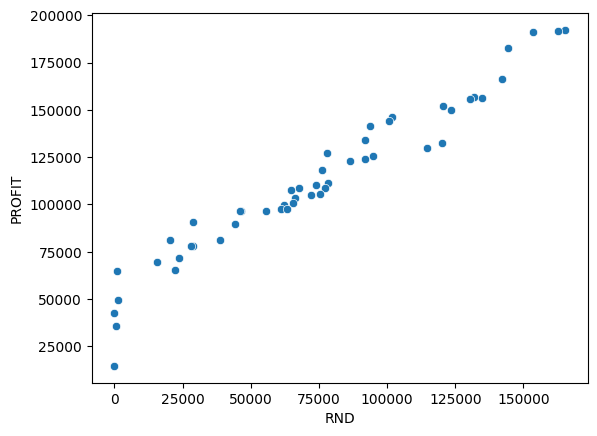

In [41]:
import seaborn as sns
sns.scatterplot(data=df, x="RND", y="PROFIT")

# Step 3 - Perform Model Building

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [43]:
# LinearRegression()
# In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
# On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

# Find out slope and intercept

In [44]:
B0= model.intercept_
model.intercept_

array([49032.89914125])

In [45]:
B1= model.coef_
model.coef_

array([[0.85429137]])

# Profit_pred = B0 + B1*RND
# Profit_pred = 49032.9 + 0.8543*RND
# Regression plot

<Axes: xlabel='RND', ylabel='PROFIT'>

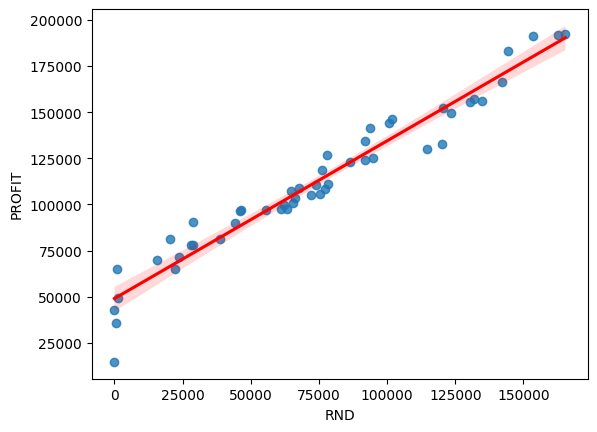

In [49]:
sns.regplot(data = df, x="RND", y="PROFIT", line_kws={"color":"red"})

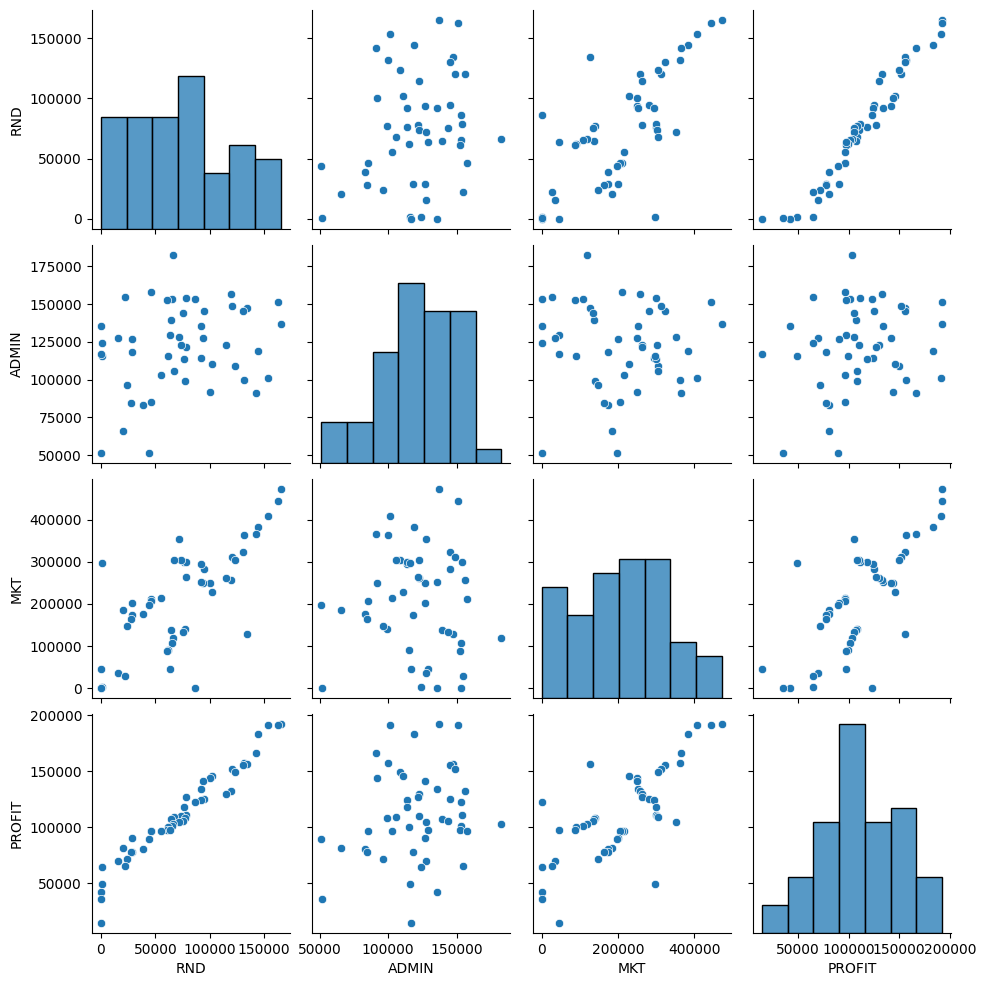

In [50]:
# Pair plot
sns.pairplot(data=df)

# Model evaluation
# 1 Root Mean Squared Error (Std error)
# 2 Mean Absolute Error
# 3 Mean Absolute Percentage error
# 4 R2 Score

In [51]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

In [52]:
def evaluate_model(model, x, y):
    # Predict the results for x
    ypred = model.predict(x)
    # Evaluate the metrics
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    # Print the metrics
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.4f}")
    print(f"R2 Score : {r2:.4f}")

In [53]:
evaluate_model(model, X, Y)

RMSE : 9226.10
MAE : 6910.98
MAPE : 0.1107
R2 Score : 0.9465


In [ ]:
# From above r2 score is 0.9465 > 0.8 hence it is a good model and can be used for out of sample predictions

# Out of sample predictionm

In [54]:
X.values[0:5]

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34]])

In [55]:
rnd = [[1_55_000]]
model.predict(rnd)

array([[181448.06163677]])

In [56]:
# Profit_pred = 49032.9 + 0.8543*RND
49032.9 + 0.8543*155000

181449.4

In [57]:
# If RND increases by 1 unit Profit will increase by 0.8543
# If RND increase by 1000 , Profit will increase by 854.3